In [31]:
import io
import os
import string
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
d

'/home/jovyan/01_worldcloud'

In [20]:
# It is important to use io.open to correctly load the file as UTF-8
text = io.open(path.join(d, 'data/happy-emoji.txt')).read()
text[400:500]

'😀 😀 😀 😀 😀\n:) :) :) :) :) :) :) :) :) :)\n😀 😀 😀 😀 😀 😀 😀 😀 😀 😀\n:) :) :) :) :) :) :) :) :) :)\n😀 😀 😀 😀 😀 '

In [21]:
# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"

In [22]:
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)

In [28]:
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)

In [29]:
# Generate a word cloud image
# The Symbola font includes most emoji
font_path = path.join(d, 'data/Symbola/Symbola.ttf')
wc = WordCloud(font_path=font_path, regexp=regexp,background_color='white').generate(text)

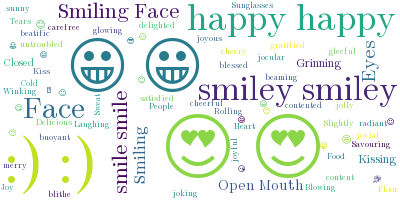

In [30]:
wc.to_image()

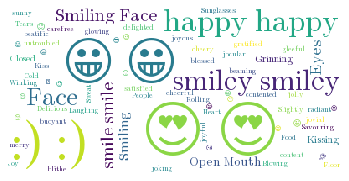

In [34]:

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")
plt.show()